In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('/content/drive/Shareddrives/Technical Communication Project/Tech comm/Sep 19 to Oct 26, 2011/201109191200_rx1_60min75bin.png')

x, y, width, height = 92, 28, 1065, 438

cropped_image = image[y:y+height, x:x+width]
  # Change this to the desired RGB color
target_color = (26, 0, 0)
# Create a mask for pixels that match the target color
mask = np.all(cropped_image == target_color, axis=2)

# Get the coordinates of matching pixels
matching_pixel_positions = np.argwhere(mask)

# Display the cropped image and the mask
# cv2.imshow('Cropped Image', cropped_image)
# cv2.imshow('Mask', mask.astype(np.uint8) * 255)
# cv2.waitKey(0)
cv2.destroyAllWindows()

# Print the positions of matching pixels
for position in matching_pixel_positions:
    x, y = position
    print(f"Matching pixel at ({x}, {y})")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
for i in range(100):
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


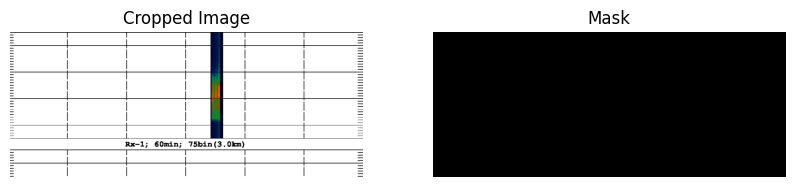

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/drive/Shareddrives/Technical Communication Project/Tech comm/Sep 19 to Oct 26, 2011/201109191200_rx1_60min75bin.png')

# Define the coordinates for cropping (x, y) and the size (width, height)
x, y, width, height = 92, 28, 1065, 438  # Adjust these values as needed

# Crop the image
cropped_image = image[y:y+height, x:x+width]

# Define the RGB values for comparison
target_color = (0,0,26)  # Change this to the desired RGB color

# Create a mask for pixels that match the target color
mask = np.all(cropped_image == target_color, axis=2)

# Get the coordinates of matching pixels
matching_pixel_positions = np.argwhere(mask)

# Display the cropped image and the mask using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')
plt.show()

# Print the positions of matching pixels
for position in matching_pixel_positions:
    x, y = position
    print(f"Matching pixel at ({x}, {y})")


In [ ]:
import cv2
import numpy as np


image = cv2.imread('/content/drive/Shareddrives/Technical Communication Project/Tech comm/Sep 19 to Oct 26, 2011/201109191200_rx1_60min75bin.png')


x1, y1 = 92, 28
x2, y2 = 1163, 466
target_colors = [(26, 0, 0),(80,18,0),(100,96,1),(71,150,0),(1,135,15),(0,48,120),(0,24,180),(1,108,223),(0,166,237),(249,226,0)]

cropped_image = image[y1:y2, x1:x2]


#target_color = (80,18,0)

color_threshold = 30
data = []
counts = []
ind = 0

matching_positions = []
for target_color in target_colors:


  for y, row in enumerate(cropped_image):
      for x, pixel in enumerate(row):
          distance = np.linalg.norm(np.array(target_color) - np.array(pixel))
          if distance <= color_threshold:
              matching_positions.append((ind,x + x1, y + y1))
  # data.append(matching_positions)
  counts.append(len(matching_positions))
  ind+=1


In [ ]:
sum(counts)

336624

In [ ]:
import pandas as pd


#converting into table
df = pd.DataFrame(matching_positions, columns=['color', 'height','time'])

# Save the DataFrame as a CSV file
df.to_csv('output.csv', index=False)
print(df)

      color  height  time
0         0     700    29
1         0     701    29
2         0     702    29
3         0     703    29
4         0     704    29
...     ...     ...   ...
6318      8     713   222
6319      8     720   222
6320      8     722   222
6321      8     724   222
6322      8     722   223

[6323 rows x 3 columns]


In [ ]:
dff = pd.read_csv("//content//output.csv")

In [ ]:
dff

,color,height,time
0,0,700,29
1,0,701,29
2,0,702,29
3,0,703,29
4,0,704,29
...,...,...,...
6318,8,713,222
6319,8,720,222
6320,8,722,222
6321,8,724,222


In [ ]:
newimage = image
print(newimage.shape)
print(newimage.size)
for i in range(len(image)):
  for j in range(len(image[0])):
    newimage[i][j]=(255,255,255)

(1489, 1319, 3)
5891973


In [ ]:
for i in matching_positions:
 # print(i[1],i[2])
  newimage[i[2]][i[1]]=target_colors[i[0]]

In [ ]:
import matplotlib.pyplot as plt

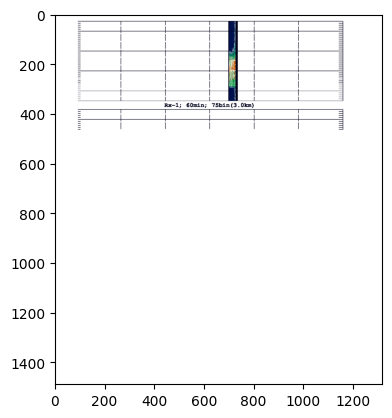

In [ ]:
plt.imshow(cv2.cvtColor(newimage, cv2.COLOR_BGR2RGB))

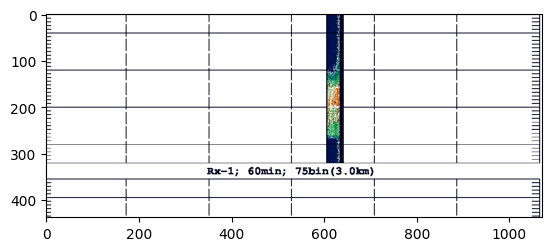

In [ ]:
cropped_image_new = newimage[y1:y2, x1:x2]
plt.imshow(cv2.cvtColor(cropped_image_new, cv2.COLOR_BGR2RGB))

In [ ]:
# Define the kernel size (must be an odd number)
kernel_size = (5, 5)  # You can adjust the size as needed

# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(cropped_image_new, kernel_size, 0)


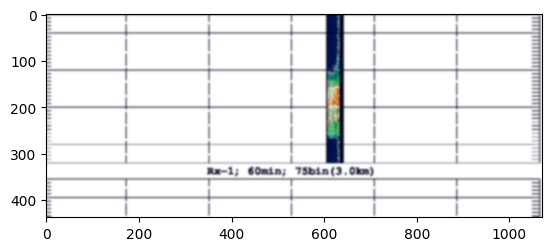

In [ ]:
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))

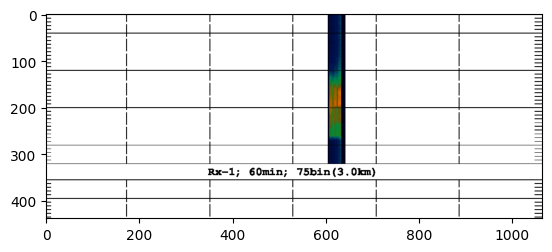

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
from PIL import Image
import os

def crop_images(input_folder, output_folder, crop_box):
    # Ensure output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate through all files in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            # Open the image
            image_path = os.path.join(input_folder, filename)
            img = Image.open(image_path)

            # Crop the image
            cropped_img = img.crop(crop_box)

            # Save the cropped image to the output folder
            output_path = os.path.join(output_folder, filename)
            cropped_img.save(output_path)

if __name__ == "__main__":
    # Specify your input and output folders
    input_folder = "path/to/input_folder"
    output_folder = "path/to/output_folder"

    # Specify the crop box (left, upper, right, lower)
    crop_box = (100, 100, 500, 500)

    # Call the function to crop images
    crop_images(input_folder, output_folder, crop_box)
